1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib
import pandas as pd
import cmath
from matplotlib import pyplot as plt

In [2]:
#Before the generation of the dataset step on must understand the characteristics of the dataset
#In the dataset there will be 3 samples with 1000 features
#Each features have been created with random normal distrubtion with given mean and standard deviation
def GenerateDataset(N):
    #Set the mean and standar deviation parameters for each samples once
    std1 = 1
    std2 = 2
    std3 = 3
    mean = 0
    
    #Generation of the samples with features as denoted in the question
    x1 = np.random.normal(mean,std1,N)
    x2 = x1 + np.random.normal(mean,std3,N)
    x3 = (2 * x1) + x2
    
    print("Shape of the generated sample x1 is: ", x1.shape)
    print("Shape of the generated sample x2 is: ", x2.shape)
    print("Shape of the generated sample x3 is: ", x3.shape,"\n")

    

    #Now we need to combine all samples in one array in order to obtain a stable dataset
    dataset = []
    dataset.append(x1)
    dataset.append(x2)
    dataset.append(x3)
    dataset = np.array(dataset)
    return dataset

#Now we have defined the function for dataset generation
#As given in the question upper limit of the features i.e columns are given as 1000
#Lets set the value for N as 1000
N = 1000

#Lets call the function in order to generate the dataset with 1000 features in each sample

dataset = GenerateDataset(N) #Returns a dataset with 1000 rows and 3 columns
print("Generated dataset with shape",dataset.shape," ","is given as follows","\n")
print(dataset,"\n")

Shape of the generated sample x1 is:  (1000,)
Shape of the generated sample x2 is:  (1000,)
Shape of the generated sample x3 is:  (1000,) 

Generated dataset with shape (3, 1000)   is given as follows 

[[ 0.19323225  1.17489098  1.32654646 ... -0.4782034   1.28387827
   0.48333931]
 [-7.54853349  2.59621318  0.67114944 ... -3.7788768   3.02902539
  -0.55440919]
 [-7.16206899  4.94599513  3.32424235 ... -4.73528361  5.59678193
   0.41226943]] 



In [3]:
#For the Covariance matrix calculation, since all the samples with given features generated with zero-mean
#Covariance matrix can be calculated with the definiton of covariance matrix calculation

#Now lets find the covariance matrix of the given dataset
covarianceMatrix = np.cov(dataset)
print("Generated covariance matrix with shape",covarianceMatrix.shape," ","is obtained as follows:","\n")
print(covarianceMatrix,"\n")
#cov = np.dot(X, X.T)/(n-1) # this would yield the same result


#For the PCA approach we will use the eigenvectors and eigenvalues as stated in the question
#We have to approaches for the calculation of eigenvalues and eigenvectors
#One of the is the eigendecomposition of the covariance matrix

################### EIGENDECOMPOSITION OF THE COVARIANCE MATRIX #######################
#Now lets find the corresponding eigenvectors and eigenvalues from the covariance matrix

eigenValues , eigenVectors = la.eig(covarianceMatrix)
#Taking the real part of the eigenvalues if it is possible
eigenValues = np.real_if_close(eigenValues)

#The eigenvalues are not necessarily sorted with the approach in eigendecomposition of the Covariance Matrix
#The eigenvalues are sorted in the decreasing order in the approach SVD
#Sorting the eigenvalues and eigenvectors that is returned from eigendecomposition
index = np.argsort(eigenValues,axis=-1)[::-1] 
eigenVectors = eigenVectors[:, index]
eigenValues = eigenValues[index]

print("Eigenvalues that have been found with shape: ",eigenValues.shape," are ","\n")
print(eigenValues,"\n")

print("Eigenvectors that have been found with shape: ", eigenVectors.shape," are :","\n")
print(eigenVectors,"\n")

#Checking that decomposition is giving the original matrix
Decomposition = np.dot(eigenVectors, np.dot(np.diag(np.real_if_close(eigenValues)), la.inv(eigenVectors)))

truthValue = np.allclose(covarianceMatrix, Decomposition)
print("Are Covariance Matrix and Decomposition equal?", truthValue,"\n")
if truthValue:
    print("Covariance Matrix and Decomposition Matrix are equal. You are in good track!")
else:
    print("Something went wrong during the eigen generation. Please check all the steps!")

Generated covariance matrix with shape (3, 3)   is obtained as follows: 

[[ 0.9771918   0.97210458  2.92648819]
 [ 0.97210458 10.37244176 12.31665092]
 [ 2.92648819 12.31665092 18.1696273 ]] 

Eigenvalues that have been found with shape:  (3,)  are  

[ 2.75150773e+01  2.00418359e+00 -3.29623960e-16] 

Eigenvectors that have been found with shape:  (3, 3)  are : 

[[-0.11007994  0.56675898 -0.81649658]
 [-0.58405522 -0.70157882 -0.40824829]
 [-0.80421509  0.43193914  0.40824829]] 

Are Covariance Matrix and Decomposition equal? True 

Covariance Matrix and Decomposition Matrix are equal. You are in good track!


In [4]:
#Second one is by using SVD finding the eigenvalues and eigenvectors
#######################################################################################

#################### SINGULAR VALUE DECOMPOSITION #####################################

# perform the SVD
UnitaryMatrixU, SpectrumMatrix, UnitaryMatrixVTranspose = la.svd(covarianceMatrix)

print("shapes: Unitary Matrix U =", UnitaryMatrixU.shape, "Spectrum Matrix:", SpectrumMatrix.shape, "Transpose of Unitary Matrix V:", UnitaryMatrixVTranspose.shape, '\n')
print("Spectrum:\n", SpectrumMatrix, '\n')
print("Unitary Matrix U:\n", UnitaryMatrixU, '\n')
print("Transpose of Unitary Matrix V:\n", UnitaryMatrixVTranspose, '\n')

shapes: Unitary Matrix U = (3, 3) Spectrum Matrix: (3,) Transpose of Unitary Matrix V: (3, 3) 

Spectrum:
 [2.75150773e+01 2.00418359e+00 1.35588538e-15] 

Unitary Matrix U:
 [[-0.11007994  0.56675898 -0.81649658]
 [-0.58405522 -0.70157882 -0.40824829]
 [-0.80421509  0.43193914  0.40824829]] 

Transpose of Unitary Matrix V:
 [[-0.11007994 -0.58405522 -0.80421509]
 [ 0.56675898 -0.70157882  0.43193914]
 [ 0.81649658  0.40824829 -0.40824829]] 



In [5]:
########################################################################################

############## YIELDING SAME RESULT CHECK ##############################################

#Rows in the Tranpose of the Unitary Matrix V are the eigenvectors(SVD)
#Whereas the columns in the eigenVector matrix is the eigenvectors

truthValueEigenValues = np.allclose(eigenValues, SpectrumMatrix)
truthValueEigenVectors = np.allclose(eigenVectors, UnitaryMatrixU)

print("Are the eigenValues are same in both approach? : ",truthValueEigenValues)
print("Are the eigenVectors are same in both approach? : ",truthValueEigenVectors)

#######################################################################################

Are the eigenValues are same in both approach? :  True
Are the eigenVectors are same in both approach? :  True


In [6]:
#RECAP
#The eigenvectors with the lowest eigenvalues bear the least information the distrubtion of the data
#These are the ones that can be dropped
#Since we have previously ranked the eigenvalues from highest to lowest
#We do not need for ranking operation

print("Percent of variabilty explained with first principle component: ", eigenValues[0]/ np.sum(eigenValues) * 100)
print("Percent of variabilty explained with second principle component: ", eigenValues[1]/ np.sum(eigenValues) * 100)
print("Percent of variabilty explained with third principle component: ", eigenValues[2]/ np.sum(eigenValues) * 100)

#It is obvious that the first and second principle component gives the most variance(percent of the variability) of the data.
#However, third principle component has no influence on the data's variability
#Hence below calculation gives the total percent of variability of first two principle components
print("Percent of variabilty explained with first and second principle component in total: ", np.sum([eigenValues[0], eigenValues[1]]) / np.sum(eigenValues) * 100)
#We know that first principle component is showing the most of the variance
#Also second principle components has the second infulential variance
#Using first principal component and second principal component, we retain 100% variability. 
#By taking into consideration of the creation of dataset, this totally makes sense.
#That is why dimensionality reductions will be done accordingly.
#However PCA3 component in this calculations, has no effect or contribution to the dataset

Percent of variabilty explained with first principle component:  93.21059019780617
Percent of variabilty explained with second principle component:  6.789409802193839
Percent of variabilty explained with third principle component:  -1.1166402905012111e-15
Percent of variabilty explained with first and second principle component in total:  100.0


In [7]:
#Rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
#Redifining the data according to the new basis of PCA
rotatedDataset = np.dot(eigenVectors.T, dataset)

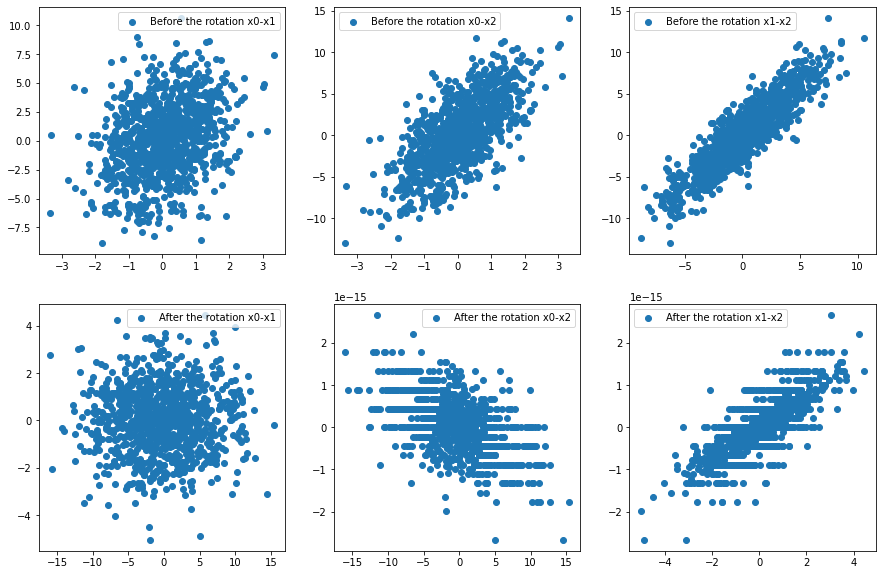

In [8]:
#Plotting the appliances in accordance with the PCA components
#Upper cells denotes the sampling of the features before the rotation (data's shown in pairwise)
#Lower cells denotes the sampling of the features after the rotation (data's shown in pairwise)

fig, ax = plt.subplots(2,3,figsize=(15, 10))
ax[0,0].scatter(dataset[0,:],dataset[1,:], label = "Before the rotation x0-x1")
ax[0,0].legend()
ax[0,1].scatter(dataset[0,:],dataset[2,:], label = "Before the rotation x0-x2")
ax[0,1].legend()
ax[0,2].scatter(dataset[1,:],dataset[2,:], label = "Before the rotation x1-x2")
ax[0,2].legend()
# order of eigendecomposition is setted the same with svd
ax[1,0].scatter(rotatedDataset[0,:],rotatedDataset[1,:], label = "After the rotation x0-x1")
ax[1,0].legend()
ax[1,1].scatter(rotatedDataset[0,:],rotatedDataset[2,:], label = "After the rotation x0-x2")
ax[1,1].legend()
ax[1,2].scatter(rotatedDataset[1,:],rotatedDataset[2,:], label = "After the rotation x1-x2")
ax[1,2].legend()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [9]:
#Creating the uncorrelated random noise
#Will generate normally distributed 10 variables with a smaller standard deviation(with factor 25)
randomNoise = np.random.normal(scale = 1/25,size=(10,3))

#Adding the noisy data to the dataset
noisyDataset = dataset + np.sum(randomNoise.T)

#Calculating the covariance matrix for eigendecomposition
noisyCovarianceMatrix = np.cov(noisyDataset)

#Eigendecemoposition of the covariance matrix phase
eigenValuesNoisy, eigenVectorsNoisy = la.eig(noisyCovarianceMatrix)

#Sorting the eigenvalue and eigenvector values
#Since we are going to compare both eigendecomposition and SVD sorting the values are necessary

index = np.argsort(eigenValuesNoisy,axis=-1)[::-1]
eigenVectorsNoisy = eigenVectorsNoisy[:, index]
eigenValuesNoisy = eigenValuesNoisy[index]

#If the values of the complex part is close to zero just assume to take real part
eigenValuesNoisy = np.real_if_close(eigenValuesNoisy)


print("Eigenvectors that are obtained from the eigendecomposition of the covariance matrix: \n", eigenVectorsNoisy, "\n")
print("Eigenvalues that are obtained from the eigendecomposition of the covariance matrix: \n", eigenValuesNoisy, "\n")

#Applying SVD for finding the eigenvalues and eigenvectors
noisyUnitaryMatrixU, noisySpectrumMatrix, NoisyTransposeUnitaryMatrixV = la.svd(noisyCovarianceMatrix)

print("Eigenvalues that are obtained from SVD: \n: ", noisySpectrumMatrix,"\n")
print("Eigenvectors that are obtained from SVD: \n", noisyUnitaryMatrixU, "\n")

#Check whether both approaches yielding the same result
print("Does the eigenvalues from the two approaches are yielding the same result? :", np.allclose(eigenValuesNoisy, noisySpectrumMatrix),"\n")
print("Does the eigenvectors rom the two approaches are yielding the same result? :", np.allclose(eigenVectorsNoisy, noisyUnitaryMatrixU),"\n")


print("Does the unnoisy eigenvalues and nosiy eigenvalues same(eigendecomposition)? :", np.allclose(eigenValues,eigenValuesNoisy),"\n")
print("Does the unnoisy eigenvectors and nosiy eigenvectors same(eigendecomposition)? :" ,np.allclose(eigenVectors,eigenVectorsNoisy),"\n")
print("Does the unnoisy eigenvalues and nosiy eigenvalues same(SVD)? :", np.allclose(SpectrumMatrix,noisySpectrumMatrix),"\n")
print("Does the unnoisy eigenvectors and nosiy eigenvectors same(SVD)? :", np.allclose(UnitaryMatrixU,noisyUnitaryMatrixU),"\n")


print("Percent of variabilty explained with first principle component: ", eigenValuesNoisy[0]/ np.sum(eigenValuesNoisy) * 100)
print("Percent of variabilty explained with second principle component: ", eigenValuesNoisy[1]/ np.sum(eigenValuesNoisy) * 100)
print("Percent of variabilty explained with third principle component: ", eigenValuesNoisy[2]/ np.sum(eigenValuesNoisy) * 100)
print("Percent of variabilty explained with first and second principle component in total: ", np.sum([eigenValuesNoisy[0], eigenValuesNoisy[1]]) / np.sum(eigenValuesNoisy) * 100)
#We have obtained the same percent of variability with the original data.
#Hence adding 10 point random noise do not have an effect on the PCA

Eigenvectors that are obtained from the eigendecomposition of the covariance matrix: 
 [[-0.11007994  0.56675898 -0.81649658]
 [-0.58405522 -0.70157882 -0.40824829]
 [-0.80421509  0.43193914  0.40824829]] 

Eigenvalues that are obtained from the eigendecomposition of the covariance matrix: 
 [ 2.75150773e+01  2.00418359e+00 -3.29623960e-16] 

Eigenvalues that are obtained from SVD: 
:  [2.75150773e+01 2.00418359e+00 1.35588538e-15] 

Eigenvectors that are obtained from SVD: 
 [[-0.11007994  0.56675898 -0.81649658]
 [-0.58405522 -0.70157882 -0.40824829]
 [-0.80421509  0.43193914  0.40824829]] 

Does the eigenvalues from the two approaches are yielding the same result? : True 

Does the eigenvectors rom the two approaches are yielding the same result? : True 

Does the unnoisy eigenvalues and nosiy eigenvalues same(eigendecomposition)? : True 

Does the unnoisy eigenvectors and nosiy eigenvectors same(eigendecomposition)? : True 

Does the unnoisy eigenvalues and nosiy eigenvalues same(S

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [10]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [11]:
columns = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
magicData = pd.read_csv("data/magic04.data", names=columns)

#Since we do not need the class data we can remove it from the dataset
magicDataNew = magicData.drop(columns=['class'])
magicDataNew

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [12]:
#First approach denotes the eigendecomposition of the covarince matrix

#Calculation of the covariance matrix
covarianceMatrixMagicDataset = magicDataNew.cov()
covarianceMatrixMagicDataset

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1794.780934,598.863542,14.064229,-4.886995,-2.800380,-924.434103,-258.727155,11.814008,-9.706818,1324.864131
fWidth,598.863542,336.577782,6.221102,-2.045137,-1.178226,-289.972346,-164.893734,15.186087,31.636694,461.786200
fSize,14.064229,6.221102,0.223349,-0.073511,-0.042243,-4.473078,2.293535,0.152121,-2.302925,15.435467
fConc,-4.886995,-2.045137,-0.073511,0.033421,0.019726,1.215195,-1.136528,-0.043003,1.122738,-4.485661
fConc1,-2.800380,-1.178226,-0.042243,0.019726,0.012213,0.655333,-0.669389,-0.025239,0.662907,-2.515795
fAsym,-924.434103,-289.972346,-4.473078,1.215195,0.655333,3505.357776,827.482747,3.147931,-86.066350,-914.690722
fM3Long,-258.727155,-164.893734,2.293535,-1.136528,-0.669389,827.482747,2601.012037,-18.266361,-247.985080,141.115155
fM3Trans,11.814008,15.186087,0.152121,-0.043003,-0.025239,3.147931,-18.266361,433.782213,2.533034,17.785198
fAlpha,-9.706818,31.636694,-2.302925,1.122738,0.662907,-86.066350,-247.985080,2.533034,681.399004,-430.253247
fDist,1324.864131,461.786200,15.435467,-4.485661,-2.515795,-914.690722,141.115155,17.785198,-430.253247,5584.839983


In [13]:
covarianceMatrixMagicDataset.shape

(10, 10)

In [14]:
#Obtaining the eigenvalues and eigenvectors from the covariance matrix eigendecomposition
eigenValuesMagicDataset, eigenVectorsMagicDataset = la.eig(covarianceMatrixMagicDataset)

print("Eigenvalues that are obtained from the eigendecomposition of the covariance matrix: ",eigenValuesMagicDataset,"\n")
print("Eigenvectors that are obtained from the eigendecomposition of the covariance matrix: ",eigenVectorsMagicDataset,"\n")


#Check whether the complex part closes to zero, if it is just take the real part
eigenValuesMagicDataset = np.real_if_close(eigenValuesMagicDataset)

Eigenvalues that are obtained from the eigendecomposition of the covariance matrix:  [6.57979140e+03+0.j 3.85387048e+03+0.j 2.01638313e+03+0.j
 1.32675968e+03+0.j 6.10187259e+02+0.j 4.33599171e+02+0.j
 1.17330074e+02+0.j 8.63965822e-02+0.j 1.07363851e-02+0.j
 3.85322858e-04+0.j] 

Eigenvectors that are obtained from the eigendecomposition of the covariance matrix:  [[ 3.27812305e-01  1.34406332e-01 -6.55078481e-02 -8.63988253e-01
  -9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [ 1.13810001e-01  5.38837224e-02  1.89938175e-02 -3.19766485e-01
   1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158421e-05]
 [ 3.06076690e-03 -6.59372017e-04 -1.05931761e-03 -6.93028658e-03
  -2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [-9.27109146e-04  2.58205308e-04  5.10399700e-04  2.60555110e-03
   1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01

In [15]:
#In order to check both of the approaches lets aply also the SVD
#Just consider always using SVD for PCA since it is more reliable than eigendecomposition

#Sorting the eigenvalue and eigenvector values
#Since we are going to compare both eigendecomposition and SVD sorting the values are necessary

index = np.argsort(eigenValuesMagicDataset,axis=-1)[::-1]
eigenVectorsMagicDataset = eigenVectorsMagicDataset[:, index]
eigenValuesMagicDataset = eigenValuesMagicDataset[index]

#Applying SVD on the dataset for finding the eigenvectors and eigenvalues
UnitrayMatrixUMagicDataset, SpectrumMatrixMagicDataset, UnitaryTransposeMatrixVMagicDataset = la.svd(covarianceMatrixMagicDataset)

print("Eigenvalues that are obtained from SVD: \n: ", SpectrumMatrixMagicDataset,"\n")
print("Eigenvectors that are obtained from SVD: \n", UnitrayMatrixUMagicDataset, "\n")

Eigenvalues that are obtained from SVD: 
:  [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04] 

Eigenvectors that are obtained from SVD: 
 [[-3.27812305e-01 -1.34406332e-01 -6.55078481e-02 -8.63988253e-01
  -9.45511967e-02 -1.98552026e-02 -3.38166662e-01  3.99907112e-03
  -4.54836725e-04 -4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02  1.89938175e-02 -3.19766485e-01
   1.97548493e-02  2.32592322e-02  9.38307839e-01  1.33847863e-02
   6.74902809e-04  5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04 -1.05931761e-03 -6.93028658e-03
  -2.65185255e-03  1.33441545e-04  1.08823228e-02 -9.27765187e-01
  -3.72229862e-01 -2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04  5.10399700e-04  2.60555110e-03
   1.53899865e-03 -3.46437681e-05 -3.06287144e-03  3.22020557e-01
  -7.69222364e-01 -5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04  2.94635944e-04  1.51275933e-03
   9.19340567e-04 -2.21

In [16]:
print("Percent of variabilty explained with first principle component: ", SpectrumMatrixMagicDataset[0]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")
print("Percent of variabilty explained with second principle component: ", SpectrumMatrixMagicDataset[1]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")
print("Percent of variabilty explained with third principle component: ", SpectrumMatrixMagicDataset[2]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")
print("Percent of variabilty explained with fourth principle component: ", SpectrumMatrixMagicDataset[3]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")
print("Percent of variabilty explained with fifth principle component: ", SpectrumMatrixMagicDataset[4]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")
print("Percent of variabilty explained with sixth principle component: ", SpectrumMatrixMagicDataset[5]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")
print("Percent of variabilty explained with seventh principle component: ", SpectrumMatrixMagicDataset[6]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")
print("Percent of variabilty explained with eight principle component: ", SpectrumMatrixMagicDataset[7]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")
print("Percent of variabilty explained with ninth principle component: ", SpectrumMatrixMagicDataset[8]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")
print("Percent of variabilty explained with tenth principle component: ", SpectrumMatrixMagicDataset[9]/ np.sum(SpectrumMatrixMagicDataset) * 100,"\n")


print("Selection of the first two componentes we have variability: ",np.sum(eigenValuesMagicDataset[0:2]) / np.sum(eigenValuesMagicDataset) * 100,"\n")
print("Selection of the first three componentes we have variability: ",np.sum(eigenValuesMagicDataset[0:3]) / np.sum(eigenValuesMagicDataset) * 100,"\n")
print("Selection of the first four componentes we have variability: ",np.sum(eigenValuesMagicDataset[0:4]) / np.sum(eigenValuesMagicDataset) * 100,"\n")
print("Selection of the first five componentes we have variability: ",np.sum(eigenValuesMagicDataset[0:5]) / np.sum(eigenValuesMagicDataset) * 100,"\n")
print("Selection of the first six componentes we have variability: ",np.sum(eigenValuesMagicDataset[0:6]) / np.sum(eigenValuesMagicDataset) * 100,"\n")
print("Selection of the first seven componentes we have variability: ",np.sum(eigenValuesMagicDataset[0:7]) / np.sum(eigenValuesMagicDataset) * 100,"\n")
print("Selection of the first eight componentes we have variability: ",np.sum(eigenValuesMagicDataset[0:8]) / np.sum(eigenValuesMagicDataset) * 100,"\n")
print("Selection of the first nine componentes we have variability: ",np.sum(eigenValuesMagicDataset[0:9]) / np.sum(eigenValuesMagicDataset) * 100,"\n")
print("Selection of the first ten componentes we have variability: ",np.sum(eigenValuesMagicDataset[0:10]) / np.sum(eigenValuesMagicDataset) * 100,"\n")



Percent of variabilty explained with first principle component:  44.04728315643294 

Percent of variabilty explained with second principle component:  25.79907386830742 

Percent of variabilty explained with third principle component:  13.498330450458196 

Percent of variabilty explained with fourth principle component:  8.881764737279314 

Percent of variabilty explained with fifth principle component:  4.084793781357052 

Percent of variabilty explained with sixth principle component:  2.902655161647734 

Percent of variabilty explained with seventh principle component:  0.7854460250763093 

Percent of variabilty explained with eight principle component:  0.0005783670774374054 

Percent of variabilty explained with ninth principle component:  7.187288591737775e-05 

Percent of variabilty explained with tenth principle component:  2.5794776802125146e-06 

Selection of the first two componentes we have variability:  69.84635702474034 

Selection of the first three componentes we have v